In [52]:
import time
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# cargando datos csv
data = pd.read_csv('data.csv')
data.dropna(inplace=True)

In [13]:
# descripcion de los datos
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.790244
std,42.888820,14.637516,16.58306,266.379919
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


In [6]:
# cargar datos.csv
datos = pd.read_csv('datos.csv')
datos = pd.get_dummies(datos)
datos

,id,edad,mes,ciudad_lser,ciudad_rcgu,ciudad_stgo
0,1,6,3,0,0,1
1,2,4,3,0,1,0
2,3,6,2,1,0,0
3,4,4,1,0,0,1
4,5,4,1,0,0,1


In [14]:

r, p = stats.pearsonr(data['Duration'], data['Pulse'])
print(f"Correlación de Pearson: r={r}, p-value={p}")

Correlación de Pearson: r=-0.1606605195419101, p-value=0.03987022730335446


{'whiskers': [<matplotlib.lines.Line2D at 0x138cb4160>,
 'caps': [<matplotlib.lines.Line2D at 0x138cb4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x138ca4e50>],
 'medians': [<matplotlib.lines.Line2D at 0x138cb4ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x138cb4f70>],
 'means': []}

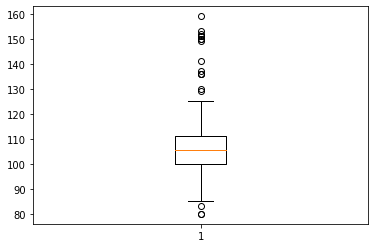

In [19]:
plt.boxplot(data['Pulse'], notch=None, vert=None, patch_artist=None, widths=None)

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Pulse'}>],
       [<AxesSubplot:title={'center':'Maxpulse'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

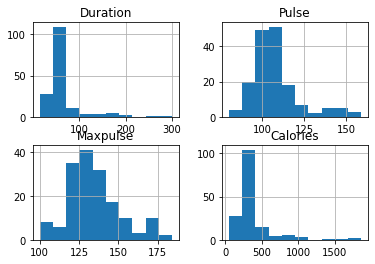

In [21]:
data.hist()


<AxesSubplot:>

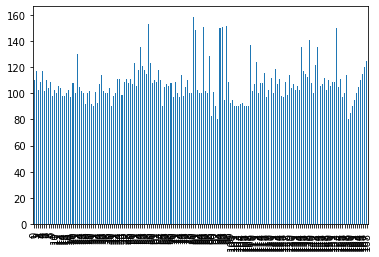

In [24]:
data['Pulse'].plot(kind='bar')

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

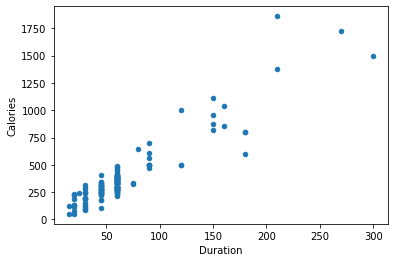

In [26]:
data.plot(kind='scatter', x='Duration', y='Calories')

<AxesSubplot:>

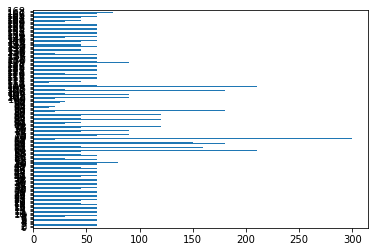

In [28]:
data['Duration'].plot(kind='barh')

In [50]:
# creando grupo X e Y
X = data['Duration']
X = X.to_numpy().reshape((-1, 1))
Y = data['Pulse']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

#X_train


In [53]:
# Implementando el modelo
model = LinearRegression()


# Entrenando el modelo
model.fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)
print("coeficiente de determinación : {} ".format(r_sq))


print("interceptor: {} ".format(model.intercept_))
print("inclinacion: {} ".format(model.coef_))

# Prediciendo
prediccion = model.predict(X_test)
print("Respuesta de predicción:\n {} ".format(prediccion))


# Predicción manual
pred_manual = model.intercept_ + model.coef_ * X_test
print("respuesta de la prediccion:\n {}".format(pred_manual))

coeficiente de determinación : 0.04707138413860179 
interceptor: 112.53424841008493 
inclinacion: [-0.07441157] 
Respuesta de predicción:
 [103.6048605  108.06955445 110.30190143 108.06955445 108.06955445
 111.04601709 108.06955445 111.04601709 108.06955445 109.18572794
 108.06955445 108.06955445 110.30190143 108.06955445 108.06955445
 108.06955445 106.95338097 111.04601709 108.06955445 108.06955445
 110.30190143  99.14016654 108.06955445 108.06955445 110.30190143
  96.90781956 108.06955445 109.18572794 108.06955445 109.18572794
 108.06955445 108.06955445 111.04601709] 
respuesta de la prediccion:
 [[103.6048605 ]
 [108.06955445]
 [110.30190143]
 [108.06955445]
 [108.06955445]
 [111.04601709]
 [108.06955445]
 [111.04601709]
 [108.06955445]
 [109.18572794]
 [108.06955445]
 [108.06955445]
 [110.30190143]
 [108.06955445]
 [108.06955445]
 [108.06955445]
 [106.95338097]
 [111.04601709]
 [108.06955445]
 [108.06955445]
 [110.30190143]
 [ 99.14016654]
 [108.06955445]
 [108.06955445]
 [110.3019

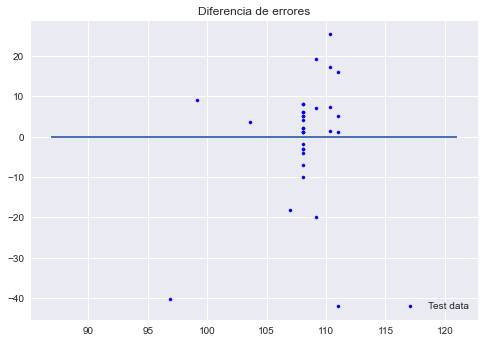

In [54]:
# Escogiendo estilo de grafico
plt.style.use('seaborn')

## Graficando la diferencia de errores del test data
plt.scatter(prediccion, prediccion - Y_test, color = "blue", s = 10, label = 'Test data')

## Graficando una Línea horizontal
plt.hlines(y = 0, xmin = min(prediccion)-10, xmax = max(prediccion)+10, linewidth = 2)


## Escribiendo la leyenda del grafico
plt.legend(loc = 'lower right')

## Escribiendo el título
plt.title("Diferencia de errores")


## Método para mostrar el gráfico
plt.show()


In [55]:
# creando grupo X e Y
X = data[['Duration','Pulse']]
Y = data['Calories']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

X_train

,Duration,Pulse
85,30,151
140,60,108
143,45,122
95,20,151
9,60,98
...,...,...
94,20,150
142,45,100
7,45,104
55,60,121


In [57]:
# Implementando el modelo
model = LinearRegression()


# Entrenando el modelo
model.fit(X_train, Y_train)

r_sq = model.score(X_train, Y_train)
print("coeficiente de determinación : {} ".format(r_sq))


print("interceptor: {} ".format(model.intercept_))
print("inclinacion: {} ".format(model.coef_))

# Prediciendo
prediccion = model.predict(X_test)
print("Respuesta de predicción:\n {} ".format(prediccion))


# Predicción manual
#pred_manual = model.intercept_ + model.coef_ * X_test
#print("respuesta de la prediccion:\n {}".format(pred_manual))


coeficiente de determinación : 0.8964652031937741 
interceptor: -277.75373275255356 
inclinacion: [5.70972887 2.66995669] 
Respuesta de predicción:
 [ 674.40940114  331.8256687   184.56341269  339.83553877  347.84540884
   90.08673029  342.50549546  244.94421831  379.88488912  251.51964897
  358.5252356   337.16558208  141.84410565  339.83553877  347.84540884
  350.51536553  484.22051906  119.45625388  350.51536553  331.8256687
  168.54367255  990.29356668  337.16558208  350.51536553  120.48445213
 1287.07339734  363.86514898  323.6084796   361.19519229  219.48016869
  361.19519229  371.87501905  130.13608064] 


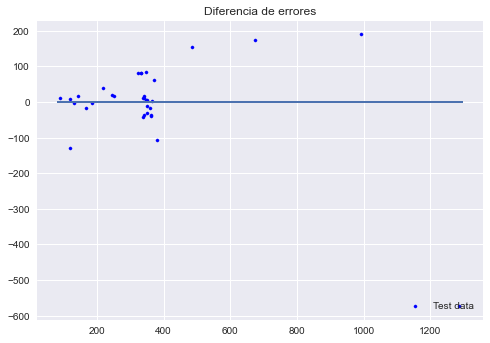

In [58]:
# Escogiendo estilo de grafico
plt.style.use('seaborn')

## Graficando la diferencia de errores del test data
plt.scatter(prediccion, prediccion - Y_test, color = "blue", s = 10, label = 'Test data')

## Graficando una Línea horizontal
plt.hlines(y = 0, xmin = min(prediccion)-10, xmax = max(prediccion)+10, linewidth = 2)


## Escribiendo la leyenda del grafico
plt.legend(loc = 'lower right')

## Escribiendo el título
plt.title("Diferencia de errores")


## Método para mostrar el gráfico
plt.show()